In [91]:
# Standard stack of imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer # used to fill missing values, fits into pipelines
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# this is probably the best way to import files that I have seen
import os
for dirname, _, filenames in os.walk('../raw_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../raw_data\gender_submission.csv
../raw_data\test.csv
../raw_data\train.csv


# TITANIC PROJECT
In this project I am trying to label which passengers survived and which ones died from the data provided. I will split my programming segments into several different parts as outlined below:

In [98]:
# read in the data
train = pd.read_csv('../raw_data/train.csv')
test = pd.read_csv('../raw_data/test.csv')

# EXPLORATORY DATA ANALYSIS


In [ ]:
train.shape
train.info()
train.describe() # useful for numeric columns

# number of missings in each column
train.isnull().sum()

train.describe().columns # get all the columms


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

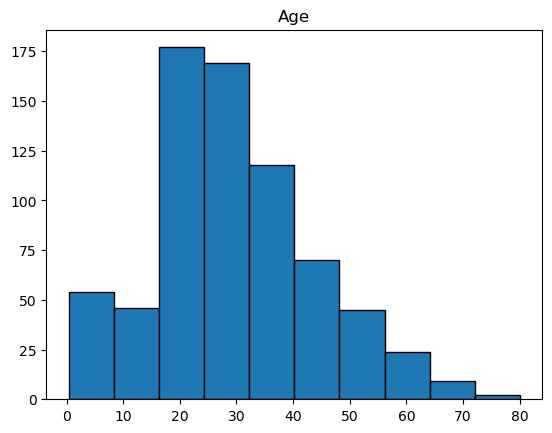

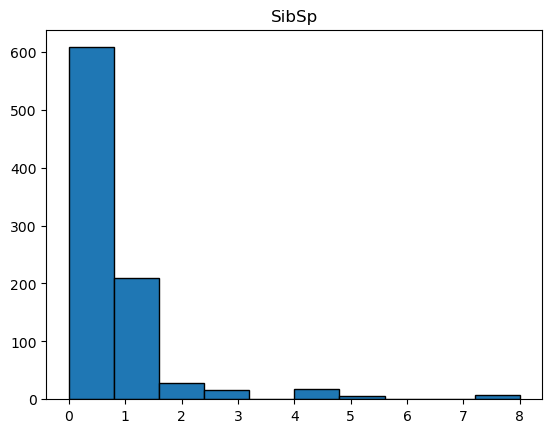

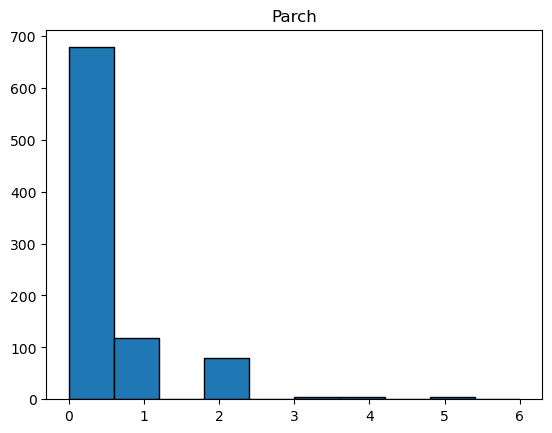

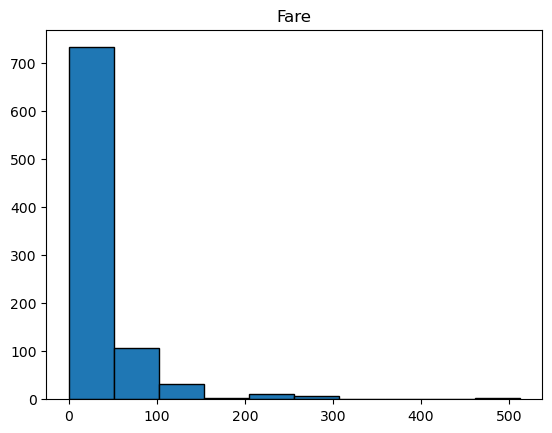

In [121]:
# first we will split the data into numeric and categorical columns
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# see the distribution of the numeric columns
for i in df_num.columns:
    plt.hist(df_num[i], bins = 10, edgecolor='black')
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

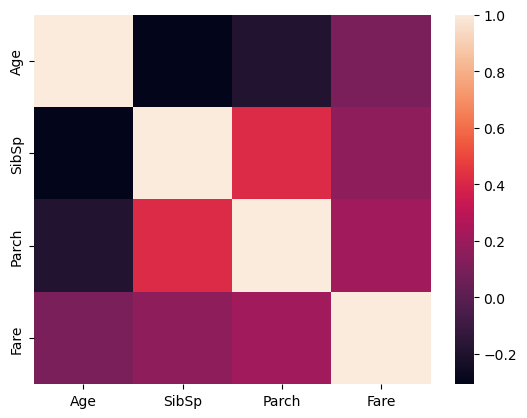

In [ ]:
print(df_num.corr())
sns.heatmap(df_num.corr()) # seems like there is some relation between sibspouse and parentchildren but not much else

In [139]:
print(pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])  )

df_num.column().mean() # useful for numeric columns


                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684


AttributeError: 'DataFrame' object has no attribute 'column'

<Axes: xlabel='Pclass', ylabel='count'>

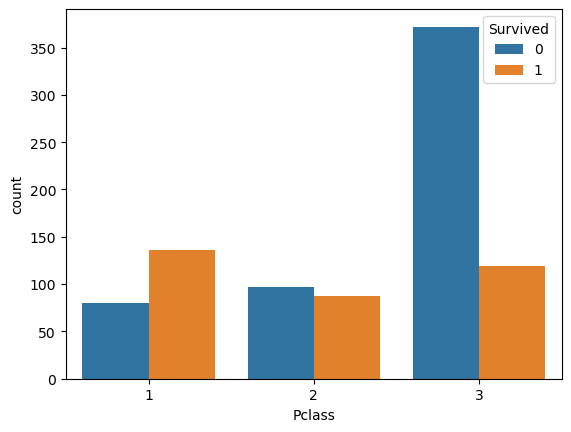

In [110]:
sns.countplot(x='Pclass', hue='Survived', data=train) # 1st class passengers had a higher chance of survival

In [94]:
# first lets turn the age into ints since there are no half ages
median_age = train['Age'].dropna().median()
print(train['Age'].dropna().median())
train['Age'] = train['Age'].fillna(median_age).astype(int)

print((train['Age'].isnull().sum())) # should be 0 now
print(train['Age'].dtype) # should be int now

28.0
0
int32


In [95]:
# encode sex into 0 and 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train.head()

# for embarked we will one-hot encode it since unlike class there is no inherent order e.g. C < Q < S
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

# drop the columns that are not useful for prediction
train = train.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,False,True
1,1,1,1,38,1,0,71.2833,False,False
2,1,3,1,26,0,0,7.9250,False,True
3,1,1,1,35,1,0,53.1000,False,True
4,0,3,0,35,0,0,8.0500,False,True


In [96]:
train["Pclass"].unique() # there are 3 diffrent classes of passengers, 1st, 2nd, and 3rd class
# survived is the target variable, 1 = survived, 0 = did not survive
# sibsp is the number of siblings or spouses abroad the titanic
# parch is the number of parents or children on board
# fare is the price of the ticket
# cabin is the cabin number
# embarked is the port of where they baorded the ship, C = Cherbourg, Q = Queenstown, S = Southampton


array([3, 1, 2], dtype=int64)

In [97]:
# try to make all of this into a pipeline
